In [88]:
import os
import pandas as pd
from io import BytesIO
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [29]:
# https://github.com/christiansafka/img2vec
# dependenceis : 
# Pytorch: http://pytorch.org/
# Pillow: pip install Pillow
from img_to_vec import Img2Vec
img2vec = Img2Vec()

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/torchvision/transforms/transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [3]:
## trying with img1
# @ param: img url @ return vector 
from PIL import Image
import requests
def get_img_vector(img):
    response = requests.get(img)
    img = Image.open(BytesIO(response.content))
    vec = img2vec.get_vec(img)
    return (vec)

In [5]:
dir_path = "/Users/akshayuppal/Desktop/launguage_vision/project/reddit"

In [6]:
## files in the reddit_data
os.listdir(dir_path)

['processed_rage.csv',
 'processed_gore.csv',
 'processed_creepy.csv',
 'processed_happy.csv']

In [7]:
df_rage = pd.read_csv(os.path.join(dir_path,'processed_rage.csv'))

In [93]:
from PIL import Image
image_url = df_rage.loc[6]["url"]
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))    

In [54]:
# works only for JPG file but not for PNG types..?(need to convert png to jpg before passing) 
# and doesnt work for http://imgur.com/uNtwClS files :(OSError: cannot identify image file <_io.BytesIO object at 0x1274c1a98>)
type(img)
vec = img2vec.get_vec(img)


In [67]:
vec1 = get_img_vector(df_rage.loc[1]["url"]) 
vec2 = get_img_vector(df_rage.loc[2]["url"])
vec3 = get_img_vector(df_rage.loc[4]["url"])
vec4 = get_img_vector(df_rage.loc[6]["url"])

In [81]:
labels = ["car","woman","girl","mother"]

In [83]:
vec = [vec1] + [vec2] + [vec3] + [vec4]

In [86]:
X_embedded = TSNE(n_components=2).fit_transform(vec)

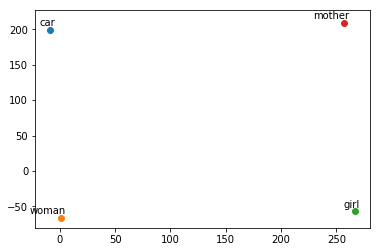

In [89]:
x= []
y =[]
for value in X_embedded:
    x.append(value[0])
    y.append(value[1])
    
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [95]:
from glove import Corpus, Glove

ModuleNotFoundError: No module named 'glove'

In [90]:
## getting the glove embeddings
class MeanEmbeddingVectorizer(object):
	def __init__(self, word2vec):
		self.word2vec = word2vec
		# if a text is empty we should return a vector of zeros
		# with the same dimensionality as all the other vectors
		self.dim = len(next(iter(word2vec.values())))

	def fit(self, X, y):
		return self

	def transform(self, X):
		return np.array([
			np.mean([self.word2vec[w] for w in words if w in self.word2vec]
					or [np.zeros(self.dim)], axis=0)
			for words in tqdm(X)
		])